# test for psa functionality

In [2]:
import os

import pandas as pd
from rdkit import Chem
import collections

# Some place to store the pattern defintions
Pattern = collections.namedtuple("Pattern", ["value", "subsearch"])
patterns = []

# Get the patterns from the tpsa.tab file, ignoring the header line
# for line in open("tpsa.tab").readlines()[1:]:
#     # Extract the fields
#     value, smarts, comment = line.split("\t")
#
#     # Use the SMARTS to define a subsearch object
#     subsearch = Chem.MolFromSmarts(smarts)
#
#     # Store for later use
#     patterns.append( Pattern(float(value), subsearch) )

# Helper function to count how many times a substructure matches
def count_matches(subsearch, mol):
    return len(mol.GetSubstructMatches(subsearch))

def TPSA(mol):
    "Compute the topological polar surface area of a molecule"
    return sum(count_matches(pattern.subsearch, mol)*pattern.value
                   for pattern in patterns)

# Test it with the reference structure


In [5]:
mol = Chem.MolFromSmiles("CN2C(=O)N(C)C(=O)C1=C2N=CN1C")
Chem.Descriptors.CalcTPSA(mol)

AttributeError: module 'rdkit.Chem' has no attribute 'Descriptors'

In [9]:
import rdkit

In [12]:
from rdkit.Chem import rdMolDescriptors
rdMolDescriptors.CalcTPSA(mol)

61.82

# test for finding MS1 peak

In [49]:
from toolsets.ms2_spectra_plotter import ms2_plot, head_to_tail_plot
def chop_msms(msms, lowest_allowed, highest_allowed):
    import bisect
    import toolsets.spectra_operations as so
    msms = so.sort_spectra(msms)
    mass, intensity = so.break_spectra(msms)
    upper_allowed = bisect.bisect_right(mass, highest_allowed)
    lower_allowed = bisect.bisect_left(mass, lowest_allowed)
    # pep_index = mass.index(parention)
    mass_choppped = mass[lower_allowed:upper_allowed]
    intensity_chopped = intensity[lower_allowed:upper_allowed]
    if len(mass_choppped)>0 and len(intensity_chopped)>0:
        return(so.pack_spectra(mass_choppped, intensity_chopped))
    else:
        return(so.pack_spectra([0],[0]))
from toolsets.search import string_search, num_search
from mimas.external.features_by_alphapept.load_mzml_data import load_mzml_data
def base_peak_finder(msms):
    import toolsets.spectra_operations as so
    mass, intensity = so.break_spectra(msms)
    max_idx = np.argmax(intensity)
    return (mass[max_idx], intensity[max_idx])
def _extract_MS1(mzml, scan_number):
    from toolsets.spectra_operations import pack_spectra
    ms1_1 = pack_spectra(mzml['mass_list_ms1'][mzml['indices_ms1'][scan_number]:mzml['indices_ms1'][scan_number+1]],
                     mzml['int_list_ms1'][mzml['indices_ms1'][scan_number]:mzml['indices_ms1'][scan_number+1]])
    return (ms1_1)

In [54]:
test_mzml = load_mzml_data("/Volumes/Samsung_T5/EAD/EAD_mzml/PFPpos_P N 3_EAD.mzML")

In [55]:
from toolsets.file_io import read_in_alphapept
test_feature = read_in_alphapept("/Volumes/Samsung_T5/EAD/output_with_ms1int/PFPpos_P N 3_EAD.csv")

In [56]:
test_library = pd.read_csv("/Users/fanzhoukong/Documents/GitHub/Libgen_data/EAD/pfp_matched.csv")

In [58]:
test_library=string_search(test_library, 'reference_Mix',  'PFPpos_P N 3_EAD')

In [62]:
test_library.iloc[2]

scan_number                                                                  143
precursor_mz                                                          501.158001
charge                                                                         1
ms1_intensity_ratio                                                     0.999287
ms1_precursor_intensity                                                  58872.0
retention_time                                                          0.399333
peaks                          115.054207\t12.218229\n126.032028\t4.835021\n1...
ms1_index                                                                     96
query_idx                                                                     46
reference_Name                 (2R,3S,4S,5R,6S)-2-[(3,4,5-trihydroxyoxan-2-yl...
reference_InChIKey                                   GGIDHIBVLYVTAU-QGPLIYBISA-N
reference_Mix                                                   PFPpos_P N 3_EAD
reference_Formula           

In [61]:
ms1 = _extract_MS1(test_mzml, 96)

In [140]:
from toolsets.alphapept_helper import centroid_data

In [141]:
mass_centroid, intensity_centroid = centroid_data(mass_ms1, intensity_ms1)

20213

In [129]:
len(mass_centroid)

3499

In [132]:
import toolsets.spectra_operations as so
mass, intensity = so.break_spectra(chop_msms(so.pack_spectra(mass_centroid, intensity_centroid), 501.158001-2, 501.158001+2))

In [133]:
mass

[499.17302748065254,
 499.1912606096775,
 499.208443308014,
 499.2231895360347,
 499.5048680517138,
 499.6504495806763,
 499.655898553262,
 499.66822569918526,
 500.1347974188183,
 500.1397527302294,
 500.14648161233015,
 500.16230745052576,
 500.17459485296285,
 500.1823191119079,
 500.21179346848896,
 500.64691600106266,
 501.10293662694494,
 501.13363241275954,
 501.157657249956,
 501.19597218949883,
 501.63505097980453,
 502.12105266386476,
 502.129015371816,
 502.14141441967166,
 502.1617908426446,
 502.1875733617258,
 502.2087706035046,
 502.2253234849047,
 503.07978020845025,
 503.09584289010553,
 503.1037847300145,
 503.11356745505924,
 503.1224406506439,
 503.1325330449125,
 503.13926471870684]

In [175]:
chopped_msms = chop_msms(so.pack_spectra(mass_centroid, intensity_centroid), 501.158001-2, 501.158001+3)

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

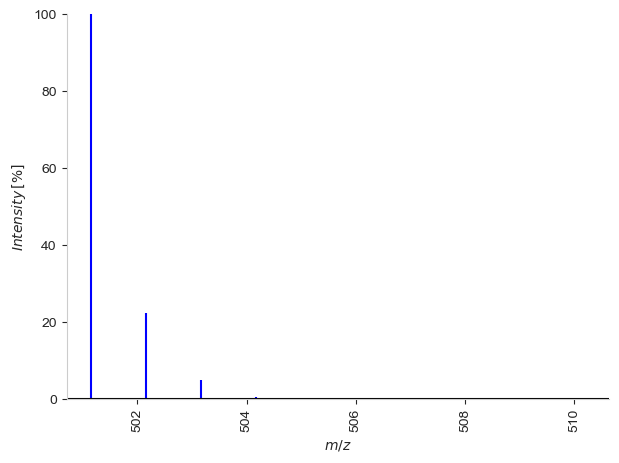

In [164]:
ms2_plot(so.pack_spectra(mass_the, intensity_the))

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

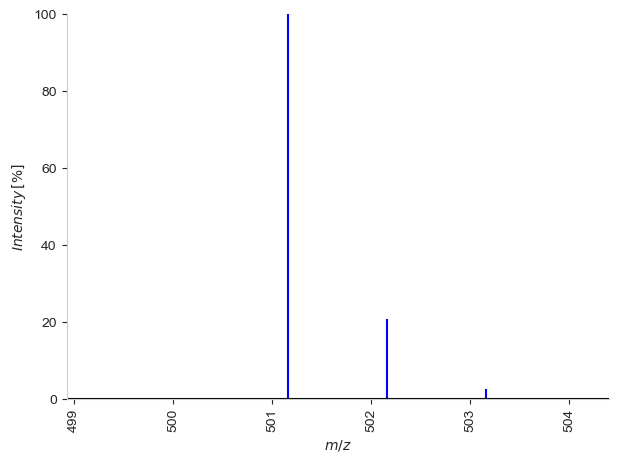

In [165]:
ms2_plot(chopped_msms)

In [174]:
mass_sorted[-2]

502.16028760530634

In [209]:
mass_emp, intensity_emp = so.break_spectra(chopped_msms)
intensity_sorted,mass_sorted = zip(*sorted(zip(intensity_emp,mass_emp  )))
instance_mol = Formula('C20H30O13')
mass_the = []
intensity_the = []
for i in instance_mol.spectrum():
    mass_the.append(instance_mol.spectrum()[i][0]+22.989218)
    intensity_the.append(instance_mol.spectrum()[i][1])
print(intensity_sorted[-1]/intensity_sorted[-2]-intensity_the[0]/intensity_the[1])
print(intensity_sorted[-2]/intensity_sorted[-3]-intensity_the[1]/intensity_the[2])

0.3500820276980816
3.5637000368667264


In [ ]:
instance_mol.

In [228]:
intensity_sorted[-3:]

(6274.0, 50116.0, 240563.0)

In [229]:
mass_sorted[-3:]

(503.16188078706125, 502.1617908426446, 501.157657249956)

In [220]:
instance_mol = Formula('K23I22')

In [ ]:
instance_mol

In [226]:
mass_the = []
intensity_the = []
for i in instance_mol.spectrum():
    mass_the.append(instance_mol.spectrum()[i][0])
    intensity_the.append(instance_mol.spectrum()[i][1])

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

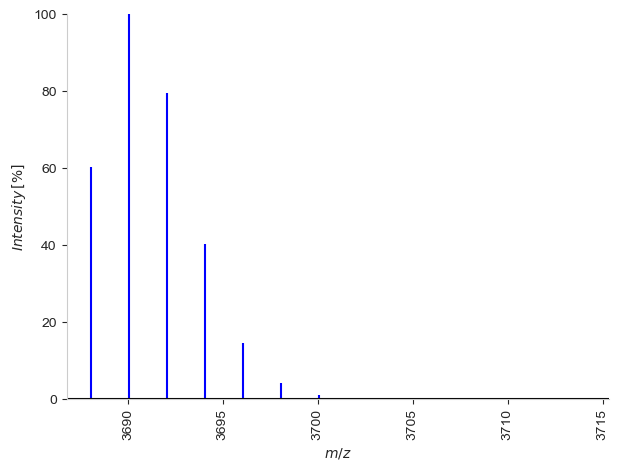

In [227]:
ms2_plot(so.pack_spectra(mass_the, intensity_the))

In [219]:
# this is wrong
instance_mol = Formula('C21H26N4O9')
mass_the = []
intensity_the = []
for i in instance_mol.spectrum():
    mass_the.append(instance_mol.spectrum()[i][0]+22.989218)
    intensity_the.append(instance_mol.spectrum()[i][1])
print(intensity_sorted[-1]/intensity_sorted[-2]-intensity_the[0]/intensity_the[1])
print(intensity_sorted[-2]/intensity_sorted[-3]-intensity_the[1]/intensity_the[2])
print(instance_mol.formula)

0.770500516709502
2.821217471888498
C21H26N4O9


-3.78061982580211

In [160]:
mass_the[0], mass_the[1]

(501.15785902130966, 502.1612777229302)

In [163]:
intensity_the[1]/intensity_the[2]

4.424186478912681

In [156]:
intensity_the[1]

0.17496921423238215

In [116]:
mass_chopped, intensity_chopped = break_spectra(chopped_ms1)

In [122]:
from toolsets.mzml_plot import EIC

In [127]:
test_mzml.keys()

dict_keys(['scan_list_ms1', 'rt_list_ms1', 'mass_list_ms1', 'int_list_ms1', 'ms_list_ms1', 'scan_list_ms2', 'rt_list_ms2', 'mass_list_ms2', 'int_list_ms2', 'ms_list_ms2', 'prec_mass_list2', 'mono_mzs2', 'charge2', 'select_windows_ms2', 'indices_ms1'])

In [140]:
from tqdm import tqdm

In [152]:
# ms1s = []
EIC_intensity = []
for i in tqdm(range(0, len(test_mzml['rt_list_ms1']))):
    # ms1s.append(_extract_MS1(test_mzml, i))
    chopped_ms1_temp = chop_msms(_extract_MS1(test_mzml, i),143.039474-0.01, 143.039474+0.01)
    mass_chopped, intensity_chopped = break_spectra(chopped_ms1_temp)
    EIC_intensity.append(np.sum(intensity_chopped) )

# for i in tqdm(range(0, len(ms1s))):
#     # mass_temp, intensity_temp = break_spectra(ms1s[i])
#     chopped_ms1_temp = chop_msms(ms1s[i],143.039474-0.01, 143.039474+0.01)
#     mass_chopped, intensity_chopped = break_spectra(chopped_ms1_temp)

    # ms1_intensity_sum = chopped_ms1_temp
    # break

100%|██████████| 2015/2015 [00:06<00:00, 293.53it/s]


<AxesSubplot:>

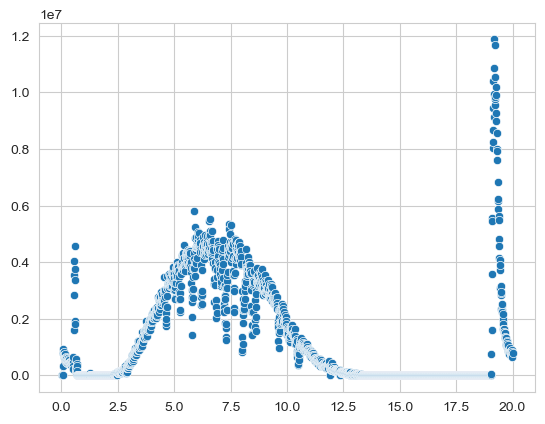

In [153]:
sns.scatterplot(x = test_mzml['rt_list_ms1'],y = EIC_intensity)

In [143]:
import seaborn as sns

In [138]:
np.sum(intensity_chopped)

0.0

In [132]:
+_extract_MS1(test_mzml,2014)

'100.01392364501953\t23845.298828125\n100.024169921875\t28359.962890625\n100.07556915283203\t9982.9755859375\n100.5097885131836\t12087.935546875\n101.00305938720703\t2728468.25\n101.0307388305664\t119802.296875\n101.09601593017578\t47317.765625\n102.00255584716797\t26389.87890625\n102.0064926147461\t60947.5\n102.01287078857422\t387276.5\n102.02947235107422\t16541.109375\n102.03375244140625\t17891.033203125\n102.05472564697266\t11159.12109375\n102.09114837646484\t55439.8671875\n102.97007751464844\t53255.21484375\n102.99881744384766\t189810.640625\n103.00563049316406\t17217.755859375\n103.95530700683594\t13281.4453125\n104.00857543945312\t21448.8046875\n104.0704574584961\t317790.8125\n104.10685729980469\t31508.373046875\n104.1850814819336\t10916.34765625\n105.49755859375\t23650.666015625\n106.00779724121094\t44851.39453125\n106.04964447021484\t16964.267578125\n106.51663970947266\t17975.48828125\n106.9918212890625\t146116.46875\n106.99978637695312\t48330.00390625\n107.95025634765625\t1393

In [129]:
test_mzml['rt_list_ms1']

array([7.3312508e-03, 2.0227117e-02, 3.1039618e-02, ..., 1.9979996e+01,
       1.9989775e+01, 1.9999636e+01])

In [128]:
test_mzml['indices_ms1']

array([      0,     362,     785, ..., 2383971, 2385216, 2386449])

100%|██████████| 10071/10071 [01:40<00:00, 100.16it/s]
/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


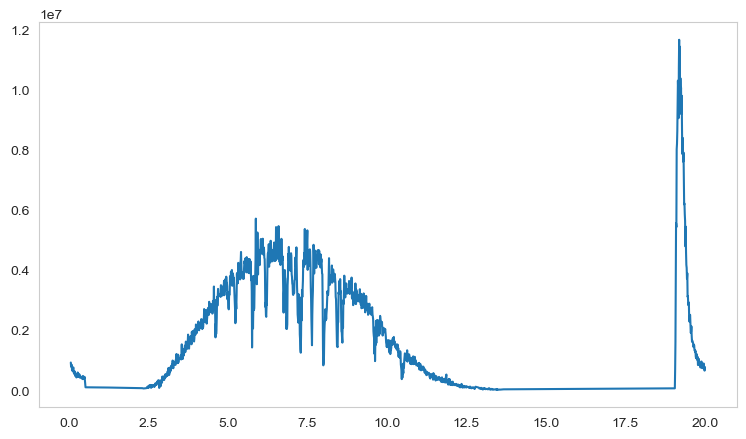

In [124]:
EIC("/Volumes/Samsung_T5/nc_mzml/CSH_Mix_1.mzML", 143.039474)

# Guess molecular formula

In [1]:
from toolsets.isotope import isotope_distribution

In [17]:
from molmass import Formula

In [35]:
test =Formula('C')

In [36]:
test.spectrum()

{12: [12.0, 0.9893], 13: [13.00335483507, 0.0107]}

In [15]:
moleclue = molmass.from_string("C2H5OH")

In [16]:
moleclue.

'C2H5OH'

In [13]:
isotope_distribution[1]

array([0.00011501, 0.        , 0.        , 0.        ], dtype=float32)

# fitting guassain peaks

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

In [27]:
import os

In [25]:
figure_dir = '/Users/fanzhoukong/Library/CloudStorage/OneDrive-Personal/Desktop/UCDAVIS_Phd/Libgen/manuscript/figures'

In [9]:
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))

In [7]:
# linearly spaced x-axis of 10 values between 1 and 10
x_array = np.linspace(1,100,50)

amp1 = 100
sigma1 = 10
cen1 = 50
y_array_gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

# creating some noise to add the the y-axis data
y_noise_gauss = (np.exp((np.random.ranf(50))))/5
y_array_gauss += y_noise_gauss

In [11]:

def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

In [8]:
amp1 = 100
sigma1 = 10
cen1 = 40

amp2 = 75
sigma2 = 5
cen2 = 65

y_array_2gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
                amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))

# creating some noise to add the the y-axis data
y_noise_2gauss = (np.exp((np.random.ranf(50))))/5
y_array_2gauss += y_noise_2gauss

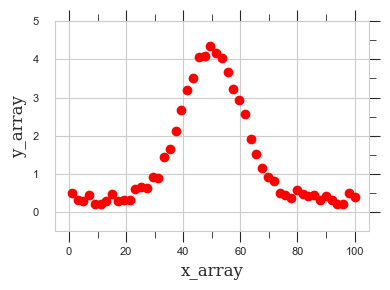

In [12]:
popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x_array, y_array_2gauss, p0=[amp1, cen1, sigma1, \
                                                                                          amp2, cen2, sigma2])

perr_2gauss = np.sqrt(np.diag(pcov_2gauss))

pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(x_array, *pars_1)
gauss_peak_2 = _1gaussian(x_array, *pars_2)

In [38]:
gauss_peak_1 = _1gaussian(x_array, *pars_1)

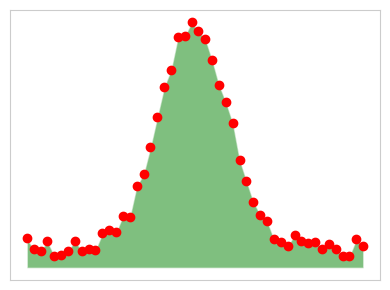

In [43]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_gauss, "ro")
ax1.fill_between(x_array, y_array_gauss, facecolor="green", alpha=0.5)
# ax1.plot(x_array, gauss_peak_1, "g")
ax1.set(xlabel=None, ylabel=None)
ax1.set(xticklabels=[], yticklabels=[])
# ax1.set_xlim(-5,105)
# ax1.set_ylim(-0.5,5)

# ax1.set_xlabel("x_array",family="serif",  fontsize=12)
# ax1.set_ylabel("y_array",family="serif",  fontsize=12)
#
# ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
# #ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
#
# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

# ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
# ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)
ax1.grid(False)
fig.tight_layout()
fig.savefig(os.path.join(figure_dir,'single_peak.png'), format="png",dpi=1000)

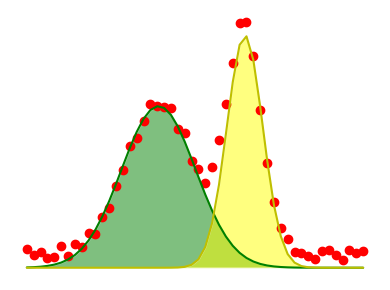

In [60]:
fig = plt.figure(figsize=(4,3))
# gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_2gauss, "ro")

# ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

# peak 1
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)

# peak 2
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)

# ax1.set_xlim(-5,105)
# ax1.set_ylim(-0.5,8)
ax1.set(xlabel=None, ylabel=None)
ax1.set(xticklabels=[], yticklabels=[])
# ax1.set_xlabel("",family="serif",  fontsize=12)
# ax1.set_ylabel("y_array",family="serif",  fontsize=12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
# ax1.spines['left'].set(color = 'grey', linewidth = 2)
# ax1.legend(loc="best")

# ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

# ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
# ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
ax1.grid(False)
fig.savefig(os.path.join(figure_dir,'feature_finding.png'), format="png",dpi=1000)

# linear regression plot

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


/var/folders/sq/fc0hszxn0q1_1cc187d_zjm80000gn/T/ipykernel_29526/3596581769.py:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edge_color" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(os.path.join(figure_dir,'recalibration.tiff'),dpi = 300,transparent=True, edge_color = 'none')


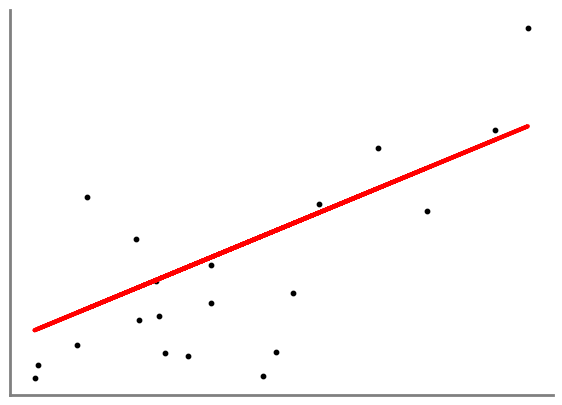

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
fig = plt.figure(figsize = (7, 5),facecolor="white")
ax = fig.subplots()
plt.scatter(diabetes_X_test, diabetes_y_test, color="black", s = 10)
plt.plot(diabetes_X_test, diabetes_y_pred, color="red", linewidth=3)
# ax.set_ylim(0, 100)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set(color = 'grey', linewidth =2)
ax.spines['left'].set_visible(True)
ax.spines['left'].set(color = 'grey', linewidth = 2)
plt.xticks(())
plt.yticks(())

# plt.show()
plt.savefig(os.path.join(figure_dir,'recalibration.tiff'),dpi = 300,transparent=True, edge_color = 'none')

# deduplication for GT data

In [13]:
import numpy as np
import pandas as pd
from toolsets.search import string_search, num_search
def deduplication_adduct(matched_dup):
    output = pd.DataFrame()
    for mix in matched_dup['File name'].unique():
        data_temp =string_search(matched_dup,'File name', mix)
        for index, row in data_temp.iterrows():
            name_filtered =find_neighbor_adducts(data_temp, row['Product name'], row['retention_time'])
            output = pd.concat([output, name_filtered], axis = 0)
    output.drop_duplicates('spectra_id', keep='first', inplace=True)
    return (output)
def find_neighbor_adducts(data_temp, compound_name, rt):
    rt_filtered = num_search(data_temp, 'retention_time',number = rt,  direction='between', step=10/60, inclusion=True)
    name_filtered = string_search(rt_filtered, 'Product name', compound_name)
    name_filtered.reset_index(inplace=True, drop=True)
    name_filtered_copy = name_filtered.copy()
    if len(name_filtered)>1:
        name_filtered_copy.sort_values(by=['confidence_level_num'], ascending=True, inplace=True, ignore_index=True)
        name_filtered_copy.drop_duplicates('Product name', keep='first', inplace=True)
        return(name_filtered_copy)
    else:
        return(name_filtered_copy)


In [10]:
matched_dup = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/GT/msms_matched_deduplicated.csv')
unmatched_dup = pd.read_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/GT/msms_unmatched_deduplicated.csv')

In [11]:
matched_dup.reset_index(inplace=True, drop=True)
unmatched_dup.reset_index(inplace=True, drop=True)

In [14]:
unmatched_dup['spectra_id']= np.arange(len(unmatched_dup))
matched_dup['spectra_id']= np.arange(len(matched_dup))
matched_dup['confidence_level_num']=matched_dup['Confidence Level '].str[-1]
unmatched_dup['confidence_level_num']=unmatched_dup['Confidence Level '].str[-1]

In [15]:
matched_deduplicated = deduplication_adduct(matched_dup)
unmatched_deduplicated = deduplication_adduct(unmatched_dup)

In [16]:
matched_deduplicated.head()

,Output type,precursor_mz,ms1_precursor_intensity,retention_time,Product name,Aglycone name,Aglycone RT,RT shift (product-substrate)RP or (substrate-product)NP,Aglycone smiles,Aglycone InChikey,...,Product ion intensity (-90.032 loss),inchikey,smiles,bond_difference,rt_match_id,hits_rt,seed_found,key,spectra_id,confidence_level_num
0,162 shift,633.4020,12200000.0,9.84,18Alpha-Glycyrrhetinic Acid_glycoside,18Alpha-Glycyrrhetinic Acid,11.99,-2.15,C[C@]12CC[C@](C[C@@H]1C3=CC(=O)[C@@H]4[C@]5(CC...,MPDGHEJMBKOTSU-PMTKVOBESA-N,...,0.0,MPDGHEJMBKOTSU,CC1(C2CCC3(C(C2(CCC1O)C)C(=O)C=C4C3(CCC5(C4CC(...,0.0,99,0,99,99[M+H]+,0,1
0,324 shift,795.4551,4390000.0,8.09,18Alpha-Glycyrrhetinic Acid_diglycoside,18Alpha-Glycyrrhetinic Acid,11.99,-3.9,C[C@]12CC[C@](C[C@@H]1C3=CC(=O)[C@@H]4[C@]5(CC...,MPDGHEJMBKOTSU-PMTKVOBESA-N,...,0.0,MPDGHEJMBKOTSU,CC1(C2CCC3(C(C2(CCC1O)C)C(=O)C=C4C3(CCC5(C4CC(...,0.0,98,0,98,98[M+H]+,11,1
0,162 shift,355.1040,2020000.0,4.08,Scopoletin_glycoside,Scopoletin,5.23,-1.15,COC1=C(C=C2C(=C1)C=CC(=O)O2)O,RODXRVNMMDRFIK-UHFFFAOYSA-N,...,0.0,RODXRVNMMDRFIK,COC1=C(C=C2C(=C1)C=CC(=O)O2)O,0.0,9380,0,9380,9380[M+H]+,578,1
0,162 shift,435.1304,5440000.0,5.72,Naringenin_glycoside,Naringenin,7.27,-1.55,C1[C@H](OC2=CC(=CC(=C2C1=O)O)O)C3=CC=C(C=C3)O,FTVWIRXFELQLPI-ZDUSSCGKSA-N,...,0.0,FTVWIRXFELQLPI,C1C(OC2=CC(=CC(=C2C1=O)O)O)C3=CC=C(C=C3)O,0.0,7587,0,7587,7587[M+H]+,2570,1
0,162 shift,317.1978,763000.0,10.59,Linalool (+)_glycoside,Linalool (+),-,#VALUE!,CC(=CCC[C@](C)(C=C)O)C,CDOSHBSSFJOMGT-JTQLQIEISA-N,...,0.0,CDOSHBSSFJOMGT,CC(=CCCC(C)(C=C)O)C,0.0,7357,0,7357,7357[M+H]+,2825,2


In [17]:
matched_deduplicated.to_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/GT/msms_matched_de_deduplicated.csv', index= False)

In [18]:
unmatched_deduplicated.to_csv('/Users/fanzhoukong/Documents/GitHub/Libgen_data/GT/msms_unmatched_de_deduplicated.csv', index= False)